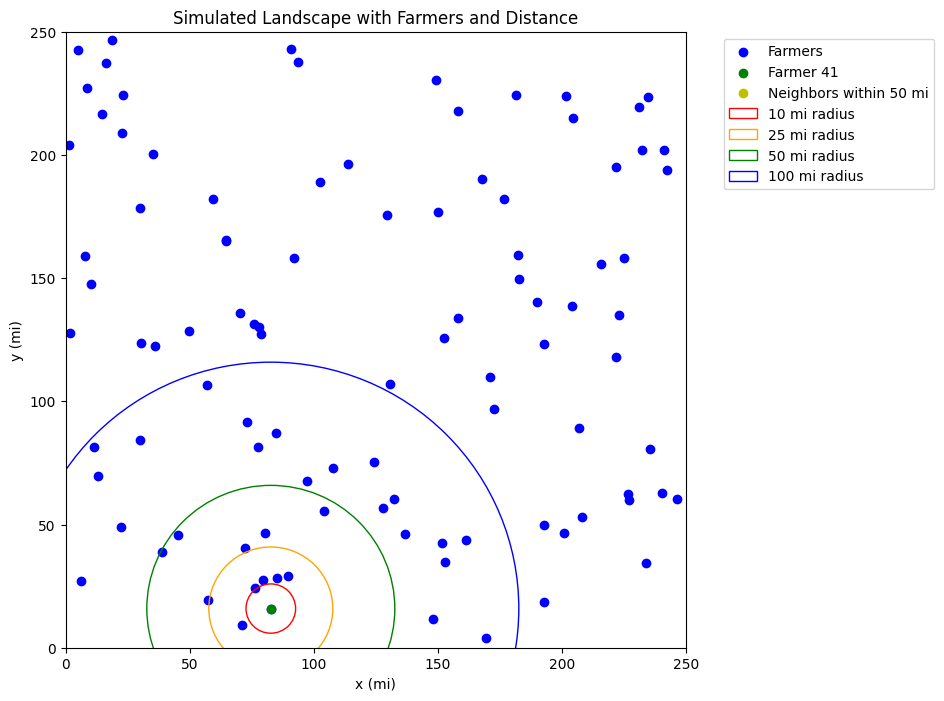

In [7]:
# Plot the landscape with farmers and the elevator
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(farmer_locations[:, 0], farmer_locations[:, 1], c="b", label="Farmers")

# Highlight an example farmer (farmer 41) and their neighbors within a 50 mi radius
example_farmer = 41
radius = 50
neighbors = np.where(distances[example_farmer] <= radius)[0]
ax.scatter(farmer_locations[example_farmer, 0], farmer_locations[example_farmer, 1], c="g", label="Farmer 41")
ax.scatter(farmer_locations[neighbors, 0], farmer_locations[neighbors, 1], c="y", label="Neighbors within 50 mi")

# Add circles around the example farmer with radii of 10, 25, 50, and 100 miles
radii = [10, 25, 50, 100]
colors = ["red", "orange", "green", "blue"]
for r, c in zip(radii, colors):
    circle = plt.Circle((farmer_locations[example_farmer, 0], farmer_locations[example_farmer, 1]), r, color=c, fill=False, label=f"{r} mi radius")
    ax.add_artist(circle)

ax.set_xlim(0, landscape_size)
ax.set_ylim(0, landscape_size)
ax.set_xlabel("x (mi)")
ax.set_ylabel("y (mi)")
ax.set_title("Simulated Landscape with Farmers and Distance")
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Create the social connectedness matrix
social_connectedness = np.exp(-distances / 50)

# Plot the social connectedness matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(social_connectedness, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Social connectedness"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Social Connectedness Matrix for Farmers")
plt.show()



In [15]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


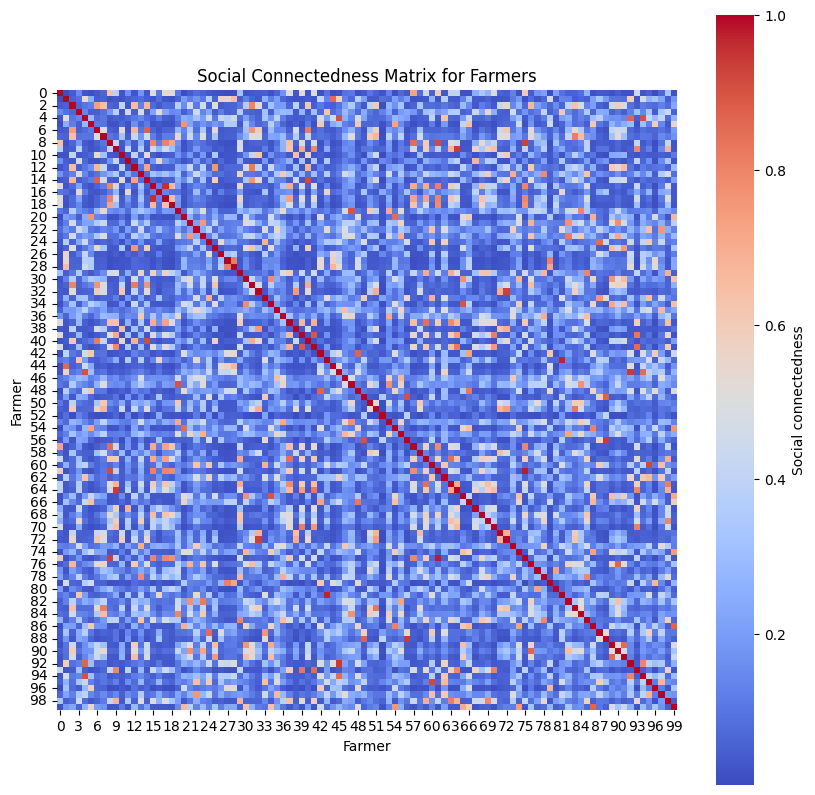

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Create the social connectedness matrix
social_connectedness = np.exp(-distances / 50)

# Plot the social connectedness matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(social_connectedness, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Social connectedness"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Social Connectedness Matrix for Farmers")
plt.show()


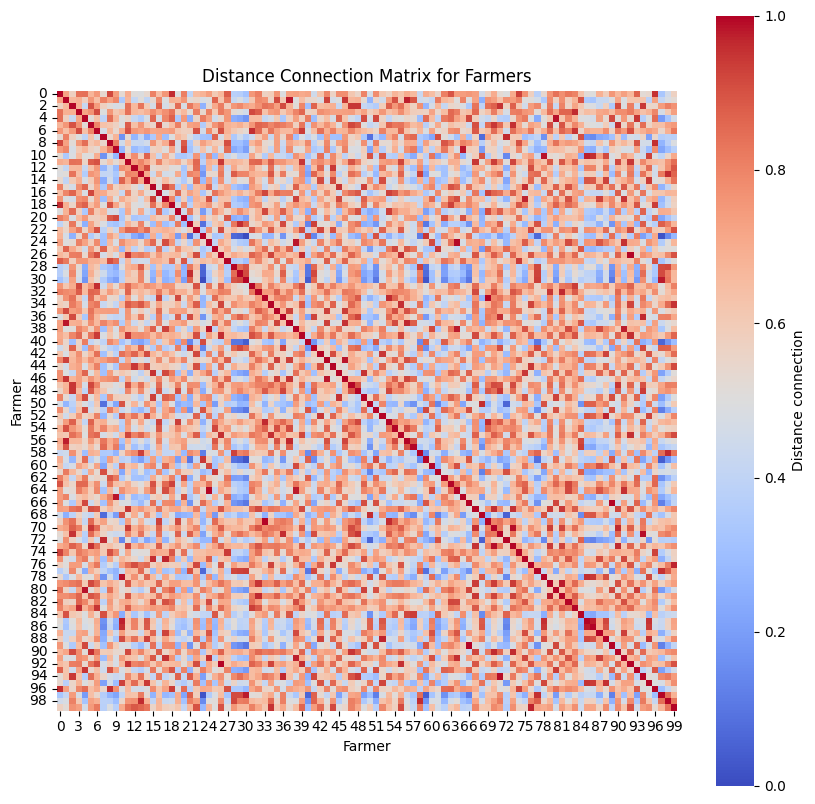

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Normalize distances (0 to 1)
normalized_distances = 1 - (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# Plot the normalized distance connection matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(normalized_distances, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Distance connection"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Distance Connection Matrix for Farmers")
plt.show()


In [1]:
import numpy as np
import pandas as pd

class Farm:
    def __init__(self, c, k):
        self.c = c
        self.k = k
        self.alpha = None
        self.J = None

    def calculate_contamination_rate(self, T):
        self.alpha = np.exp(-self.c * T * self.k)
        return self.alpha

    def calculate_cost_function(self, f, beta, P, c_e, c_k):
        self.J = sum([f[i] * self.alpha * np.prod(beta[:i+1]) + f[i+1] * self.alpha * np.prod(1 - beta[:i+1]) * beta[i+1] for i in range(4)])
        self.J += f[5] * self.alpha * np.prod(1 - beta) * P + c_e + c_k
        return self.J

    def update_risk_control_effort(self, D1, D2, h, delta, T, lambda_1, lambda_2, lambda_3):
        self.c = self.c + lambda_1 * D1 + lambda_2 * D2 + lambda_3 * (D2 - h) + delta * T

    def update_risk_control_technology(self, D1, D2, D3, T, omega_1, omega_2, omega_3):
        self.k = self.k + omega_1 * D1 + omega_2 * D2 + omega_3 * D3 * T

In [2]:
import numpy as np

# Class to store parameters and initial conditions
class Parameters(object):
    def __init__(self) -> None:
        # Parameters for testing regime
        self.f_test_range = np.arange(0.4, 0.4, 0.1)
        self.p_test_range = np.arange(0.1, 0.4, 0.1)
        self.d_test_range = np.arange(0.0001, 0.0002, 0.0001)
        self.r_test_range = np.arange(0.0001, 0.0002, 0.0001)
        
        # Parameters for Farmer Behavior
        [beta1,beta2,beta3,beta4] = np.around(np.random.uniform(low=0.01, high=0.2, size=(4,)),4)
        [f1,f2,f3,f4] = np.random.rand(4)
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.beta4 = beta4
        self.f1 = f1
        self.f2 = f2
        self.f3 = f3
        self.f4 = f4
        
        # Population
        self.farm_population = 1
        self.packer_population = 1
        self.distributor_population = 1
        self.retailer_population = 1
        self.customer_population = 5000
        
        # Size of plot, box, and farm
        self.plot_per_farm = 1856
        self.box_per_P = 31562
        self.box_per_D = 31562
        self.box_per_R = 31562

        self.box_per_plot = 17
        self.contamination_rate = 0.06

        self.d_test_rate = 0.0
        self.r_test_rate = 0.0
        
        # Initialising some lists
        self.box_ids_l=[]
        self.box_ids_C_l=[]
        self.dropped_boxes_F_l=[]
        self.dropped_boxes_P_l=[]
        self.dropped_boxes_D_l=[]
        self.dropped_boxes_R_l=[]
        self.dropped_boxes_C_l=[]
        self.detection_percent_l=[]
        
        self.iterations = 10

        # Test cost at each stage
        self.test_cost_F = 350
        self.test_cost_P = 50
        self.test_cost_D = 50
        self.test_cost_R = 50

        # Customer demand
        self.box_cap = 50
        self.number_plot = self.farm_population * self.plot_per_farm
        self.number_box = self.number_plot * self.box_per_plot
        self.customer_number = int(self.number_box * self.box_cap * (0.80 - self.contamination_rate))
        self.customer_demand = np.floor(np.abs(np.random.normal(1, 2, (self.customer_number, 1))))

        # Customer illness cost
        self.ill_rate = 0.04
        self.hospital_rate = 0.0164
        self.death_rate = 0.000041
        self.ill_compensation = 719
        self.hospital_compensation = 18438
        self.death_compensation = 1764112

        # Recall and Trace cost
        self.unit_recall_labor_cost = 10
        self.unit_trace_labor_cost = 10
        self.price_per_box = 100

        # Transportation cost
        self.unit_trans_cost = 0.007
        self.cost_indicator = 1
        self.F_P_distance = 5
        self.P_D_distance = 2983
        self.D_R_distance = 11


In [4]:
# Define functions 

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask
def generate_contamination_mask(total_plots, contamination_rate):
    contaminated_plots = int(total_plots * contamination_rate)
    plot_mask = np.zeros(total_plots, dtype=np.bool_)
    plot_mask[:contaminated_plots] = True
    np.random.shuffle(plot_mask)
    return np.repeat(plot_mask, box_per_plot)


def generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot):
    farm_range = np.arange(1, farm_population + 1)
    plot_range = np.arange(1, plot_per_farm + 1)
    box_range = np.arange(1, box_per_plot + 1)
    farm_grid, plot_grid, box_grid = np.meshgrid(farm_range, plot_range, box_range)
    return (farm_grid * 10000000000 + plot_grid * 100000 + box_grid).ravel()

# define testing at each stage

'''
# Only contaminated tested boxes are dropped
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes'''
# All boxes in same plot in which tested contaminated box is found are dropped
def run_stage(box_ids, contamination_mask, test_rate,box_per_plot):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        plot_farm_ids_tested = tested_contaminated_boxes - tested_contaminated_boxes % 100
        #plot_farm_ids_all = box_ids - box_ids % 100
        tested_contaminated_boxes_all=np.repeat(np.unique(plot_farm_ids_tested),box_per_plot)+ np.tile(np.arange(1, box_per_plot + 1),np.unique(plot_farm_ids_tested).shape[0])
        #plot_boxes = np.array([generate_box_id(farm_idxs[i], plot_idxs[i], box_idx) for i in range(tested_contaminated_boxes.size) for box_idx in range(1, box_per_plot+1)])
        #remaining_boxes = box_ids[~np.isin(box_ids, dropped_boxes)]
        #tested_contaminated_boxes= np.array(list(dropped_boxes))
        dropped_boxes = set(np.unique(tested_contaminated_boxes_all))
        mask = np.isin(box_ids, tested_contaminated_boxes_all)
        contamination_mask = contamination_mask[~mask]
        box_ids_n = box_ids[~mask]
        #dropped_boxes = set(tested_contaminated_boxes)
    else:
        dropped_boxes = set()
        box_ids_n = box_ids
    remaining_boxes = box_ids_n

    return remaining_boxes, contamination_mask, dropped_boxes, sum(tested_boxes_mask)
# Cost Calculation 

# Transportation cost
def transportation_cost(box_ids_F_P,box_ids_P_D,box_ids_D_R):
    trans_cost_F_P = (len(box_ids_F_P) // box_per_P +1 )* F_P_distance * unit_trans_cost
    trans_cost_P_D = (len(box_ids_P_D) // box_per_D +1 )* P_D_distance * unit_trans_cost
    trans_cost_D_R = (len(box_ids_D_R) // box_per_R + 1) * D_R_distance * unit_trans_cost
    return trans_cost_D_R+trans_cost_P_D+trans_cost_F_P

def testing_cost(tests_F,tests_P,tests_D,tests_R):
    return tests_F*test_cost_F+tests_P*test_cost_P+tests_D*test_cost_D+tests_R*test_cost_R

# Customer consumption and illness report 
def customer_illness_cost(box_ids_R_C,contamination_mask):
    #boxes_allotted = np.zeros((customer_number,2),dtype=int)
    all_boxes= box_ids_R_C
    boxes_allotted_cont = np.zeros(customer_number,dtype=bool)
    current_box_cap = box_cap
    current_box_id = 0
    current_box_contaminated = contamination_mask[current_box_id]
    contaminated=sum(contamination_mask)
    #customer_demand = np.sort(customer_demand)[::-1]
    if contaminated:
        for i, current_customer_demand in enumerate(customer_demand):
            if current_customer_demand == 0:
                continue
            else:
                if current_box_cap - current_customer_demand >= 0:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_cap -= current_customer_demand
                    boxes_allotted_cont[i]=current_box_contaminated
                    if current_box_cap == 0:
                        current_box_id += 1
                        if current_box_id < len(all_boxes):
                            current_box_contaminated = contamination_mask[current_box_id]
                        else:
                            current_box_contaminated = False                      
                        current_box_cap = box_cap
                else: 
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_id += 1
                    if current_box_id < len(all_boxes):
                        cont= contamination_mask[current_box_id]
                    else:
                        cont=current_box_contaminated
                    current_box_cap = box_cap - current_customer_demand - current_box_cap
                    boxes_allotted_cont[i]=cont+current_box_contaminated 
                    current_box_contaminated = cont
                    #boxes_allotted[i,1]=all_boxes[current_box_id]
        customers_contaminated = sum(boxes_allotted_cont)
    else:
        customers_contaminated = 0

    ill_number = np.random.rand(customers_contaminated, 1)
    hospital_number = np.random.rand(customers_contaminated, 1)
    death_number = np.random.rand(customers_contaminated, 1)

    death_number = death_number < death_rate
    death_case_number = np.sum(death_number)

    hospital_number = hospital_number < hospital_rate
    hospital_case_number = np.sum(hospital_number)

    ill_number = ill_number < ill_rate
    ill_case_number = np.sum(ill_number)
    cust_cost = death_case_number * death_compensation + hospital_case_number * hospital_compensation + ill_case_number * ill_compensation
    return cust_cost

def recall_cost(contamination_mask):
    return sum(contamination_mask)* (unit_recall_labor_cost+unit_trace_labor_cost+price_per_box)
    
    
# Function to check if a value is in an array
#@nb.njit(parallel=True) 
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        out[i] = a[i] in b
    return out


    
# Run testing and return the number of boxes dropped at each stage
def run_test():
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot)
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)
    box_ids_F_P, contamination_mask1, dropped_boxes_F,tests_F = run_stage(box_ids, contamination_mask, f_test_rate,box_per_plot)
    box_ids_P_D, contamination_mask2, dropped_boxes_P,tests_P = run_stage(box_ids_F_P, contamination_mask1, p_test_rate,box_per_plot)
    box_ids_D_R, contamination_mask3, dropped_boxes_D,tests_D = run_stage(box_ids_P_D, contamination_mask2, d_test_rate,box_per_plot)
    box_ids_R_C, contamination_mask4, dropped_boxes_R,tests_R = run_stage(box_ids_D_R, contamination_mask3, r_test_rate,box_per_plot)
    return (
        transportation_cost(box_ids_F_P, box_ids_P_D, box_ids_D_R)
        + customer_illness_cost(box_ids_R_C, contamination_mask4)
        + testing_cost(tests_F, tests_P, tests_D, tests_R)
        + recall_cost(contamination_mask4)
    )



In [6]:
import numpy as np 
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

import parameters 
import gc
gc.enable()
 
class Farm:
    def __init__(self, id, technology_level, initial_contamination_rate, region_mean_contamination_rate):
        self.id = id
        self.technology_level = technology_level
        self.contamination_rate = initial_contamination_rate
        self.region_mean_contamination_rate = region_mean_contamination_rate
        self.cost_effort = 0
        self.cost_technology = 0
        self.penalties = [0, 0, 0, 0, 0]
        self.testing_regimes = [0, 0, 0, 0]
        
    def update_contamination_rate(self, c, k, t):
        # calculate new contamination rate based on Eq. (3)
        c_j_t = c[self.id][t]
        k_j_t = k[self.id][t]
        alpha_j_t = np.exp(-c_j_t * k_j_t)
        self.contamination_rate = alpha_j_t * self.region_mean_contamination_rate
        
    def calculate_cost(self, f, beta, P, c_e, c_k):
        # calculate total cost function based on Eq. (4)
        f1, f2, f3, f4, f5 = f
        beta1, beta2, beta3, beta4 = beta
        numerator = f1 * beta1 + f2 * (1 - beta1) * beta2 + f3 * (1 - beta1) * (1 - beta2) * beta3 + \
                    f4 * (1 - beta1) * (1 - beta2) * (1 - beta3) * beta4 + f5 * (1 - beta1) * (1 - beta2) * \
                    (1 - beta3) * (1 - beta4) * P
        denominator = (c_e + c_k) * (1 - beta1) * (1 - beta2) * (1 - beta3) * (1 - beta4)
        self.cost_effort = c_e
        self.cost_technology = c_k
        self.penalties = [f1, f2, f3, f4, f5]
        self.testing_regimes = [beta1, beta2, beta3, beta4]
        return numerator / denominator
        
    def update_risk_control_behavior(self, f, beta, P, c_e, c_k, c, k, t, neighbors):
        # update risk control behavior based on Eq. (5) and the behavior of neighboring farms
        cost = self.calculate_cost(f, beta, P, c_e, c_k)
        for neighbor in neighbors:
            cost += neighbor.calculate_cost(f, beta, P, c_e, c_k)
        self.cost_effort = c_e
        self.cost_technology = c_k
        self.penalties = [f1, f2, f3, f4, f5]
        self.testing_regimes = [beta1, beta2, beta3, beta4]
        self.contamination_rate = self.region_mean_contamination_rate
        self.contamination_rate += np.random.normal(loc=0, scale=self.technology_level)
        self.contamination_rate += np.random.uniform(low=-1, high=1) * c[self.id][t]
        self.contamination_rate += np.sum([np.random.uniform(low=-1, high=1) * neighbor.contamination_rate for neighbor in neighbors])
        self.update_contamination_rate(c, k, t)
        self.cost = self.calculate_cost(f, beta, P, c_e, c_k)

class Supply(object):
    def __init__(self,parameters):
        self.parameters = parameters
        self.farms = Farms(self.parameters)
        self.packers = Packers(self.parameters)
        self.distributors = Distributors(self.parameters)
        self.retailers = Retailers(self.parameters)
        self.customers = Customers(self.parameters)
    
    def update_contaminate_rate(self):
        self.farms.update_contaminate_rate()
    
    def find_optimal_testing_rate(self):
        self.farms.find_optimal_testing_rate()
    
    def testing_with_optimal_rate(self):
        self.farms.testing_with_optimal_rate()
    
    def impose_penalties_costs(self):
        self.farms.impose_penalties_costs()
        
class Monthly(object):
    def __init__(self,parameters):
        self.parameters = parameters
        self.monthly = Monthly(self.parameters)
    
    def farmers_update_contaminate_rate(self):
        self.supply.update_contaminate_rate()
    
    def find_optimal_testing_rate(self):
        self.supply.find_optimal_testing_rate()
    
    def testing_with_optimal_rate(self):
        self.supply.testing_with_optimal_rate()
    
    def impose_penalties_costs(self):
        self.supply.impose_penalties_costs()


In [7]:
import matplotlib.pyplot as plt

# Create a grid of f_test_rate and p_test_rate values
f, p = np.meshgrid(np.arange(0.01, 0.05, 0.01), np.arange(0.01, 0.05, 0.01))

# Reshape the costs_mean array to match the grid shape
c = np.reshape(costs_mean, (4, 4))

# Create a contour plot of the costs_mean
fig, ax = plt.subplots()
cp = ax.contourf(f, p, c, cmap='cool')
plt.colorbar(cp)

# Add labels and title
ax.set_xlabel('f_test_rate')
ax.set_ylabel('p_test_rate')
ax.set_title('Optimal Cost Solution')

plt.show()


NameError: name 'costs_mean' is not defined

In [12]:
#lists_all = [ftest_rate, ptest_rate, costs_mean, costs_std]
ftest_rate = lists_all[0]
ptest_rate = lists_all[1]
costs_mean = lists_all[2]
costs_std = lists_all[3]

Optimal f_test_rate: 0.03
Optimal p_test_rate: 0.02
Optimal cost: 16439747.463000001


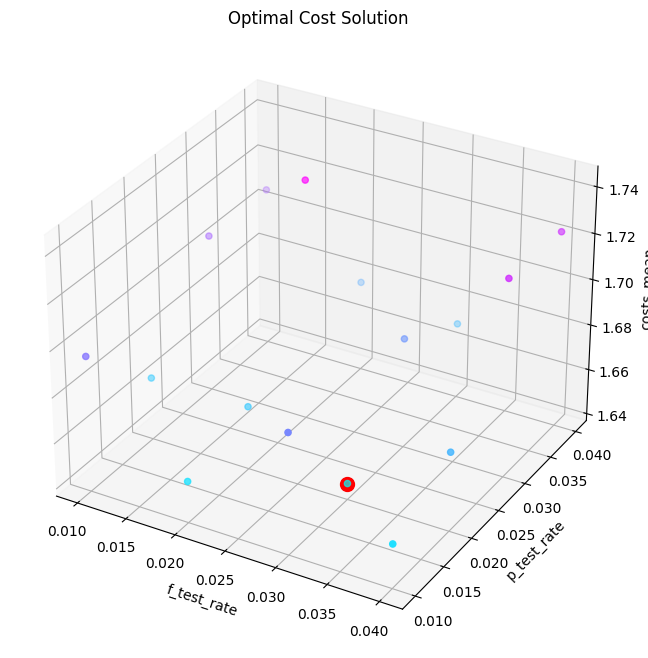

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Find the index of the minimum value in the costs_mean array
min_idx = np.argmin(costs_mean)

# Get the corresponding values of f_test_rate and p_test_rate
opt_f = ftest_rate[min_idx]
opt_p = ptest_rate[min_idx]
opt_cost = costs_mean[min_idx]

# Print the optimal values
print('Optimal f_test_rate:', opt_f)
print('Optimal p_test_rate:', opt_p)
print('Optimal cost:', opt_cost)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ftest_rate, ptest_rate, costs_mean, c=costs_mean, cmap='cool')
ax.scatter(opt_f, opt_p, opt_cost, c='red', s=100)
ax.set_xlabel('f_test_rate')
ax.set_ylabel('p_test_rate')
ax.set_zlabel('costs_mean')
ax.set_title('Optimal Cost Solution')
plt.show()


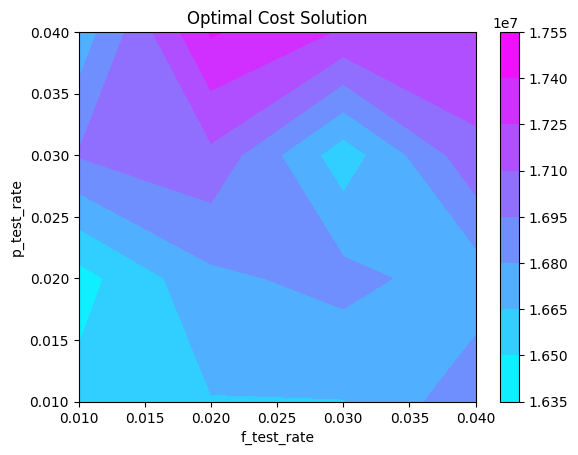

In [14]:
import matplotlib.pyplot as plt

# Create a grid of f_test_rate and p_test_rate values
f, p = np.meshgrid(np.arange(0.01, 0.05, 0.01), np.arange(0.01, 0.05, 0.01))

# Reshape the costs_mean array to match the grid shape
c = np.reshape(costs_mean, (4, 4))

# Create a contour plot of the costs_mean
fig, ax = plt.subplots()
cp = ax.contourf(f, p, c, cmap='cool')
plt.colorbar(cp)

# Add labels and title
ax.set_xlabel('f_test_rate')
ax.set_ylabel('p_test_rate')
ax.set_title('Optimal Cost Solution')

plt.show()


NameError: name 'T' is not defined

<Figure size 1000x600 with 0 Axes>

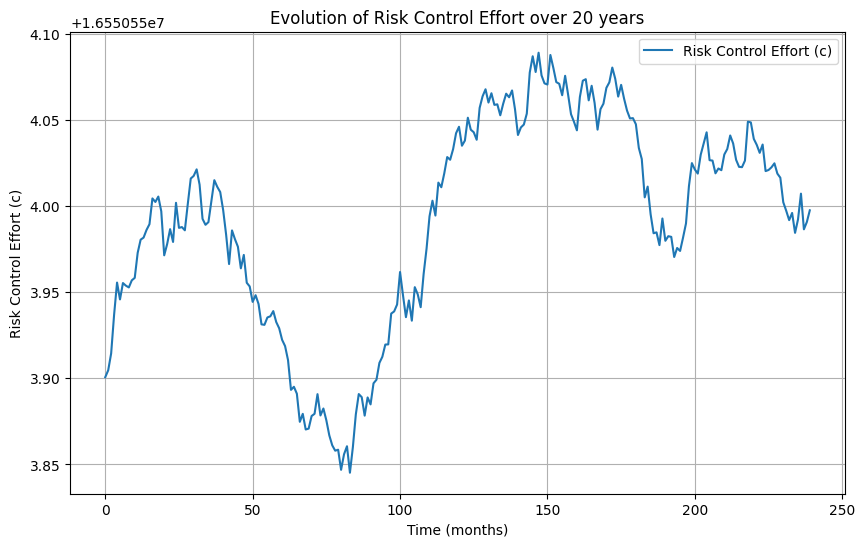

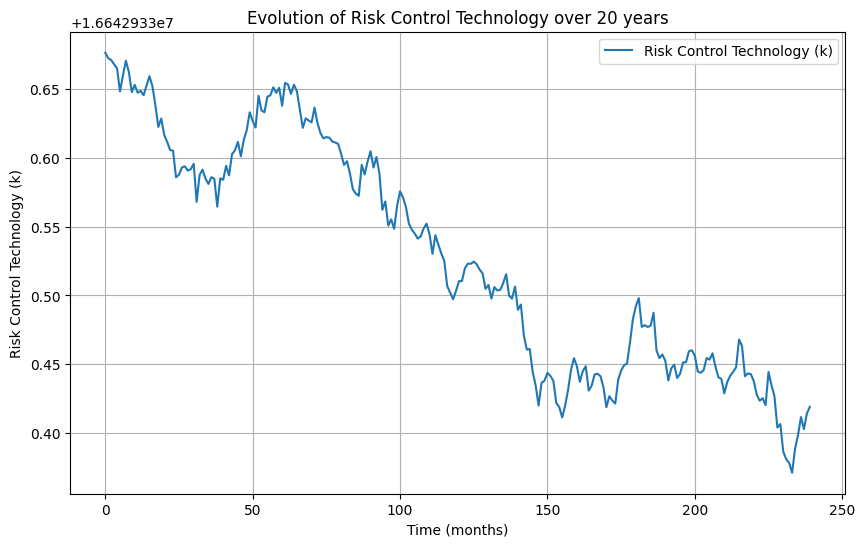

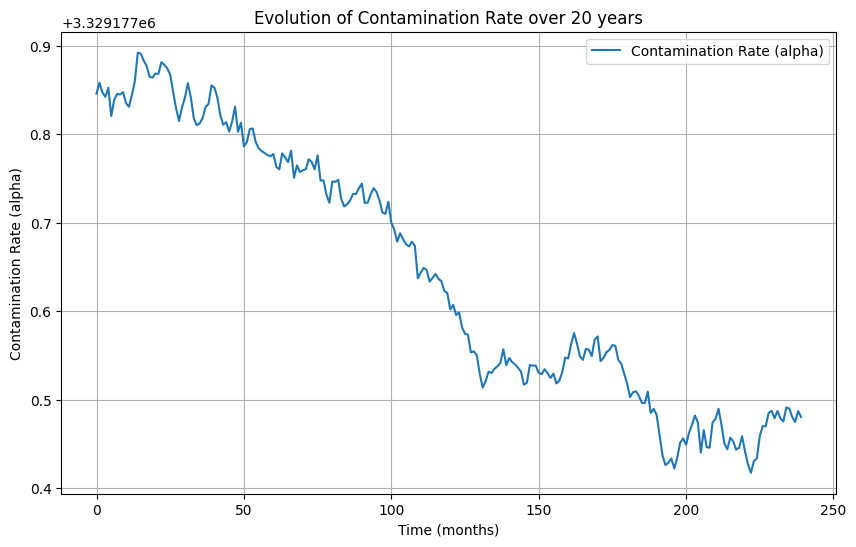

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T, alpha/5, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

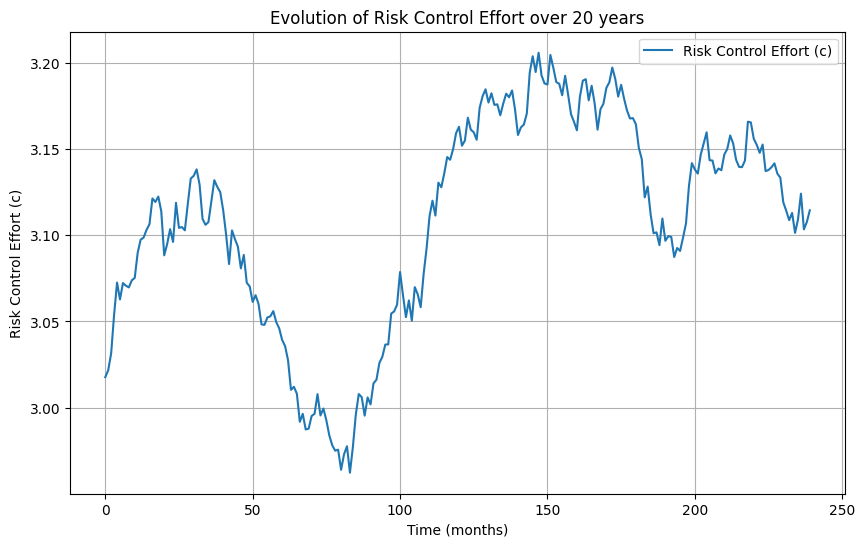

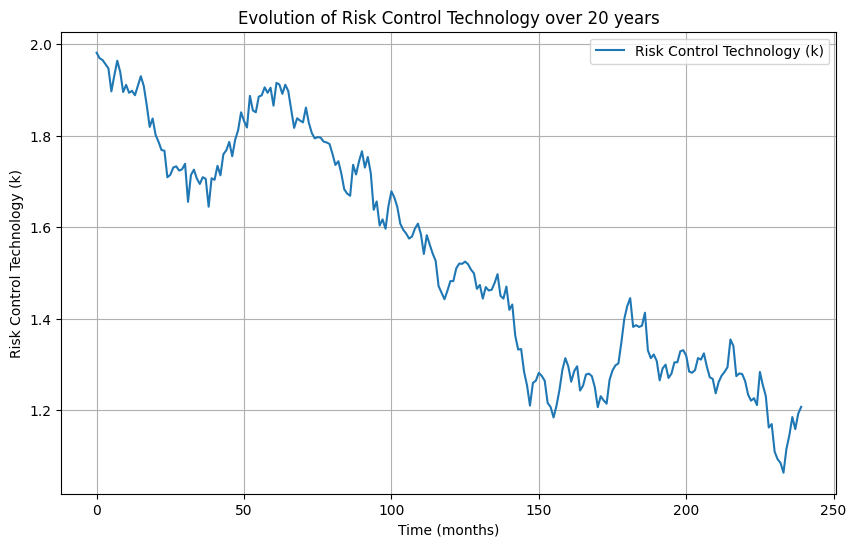

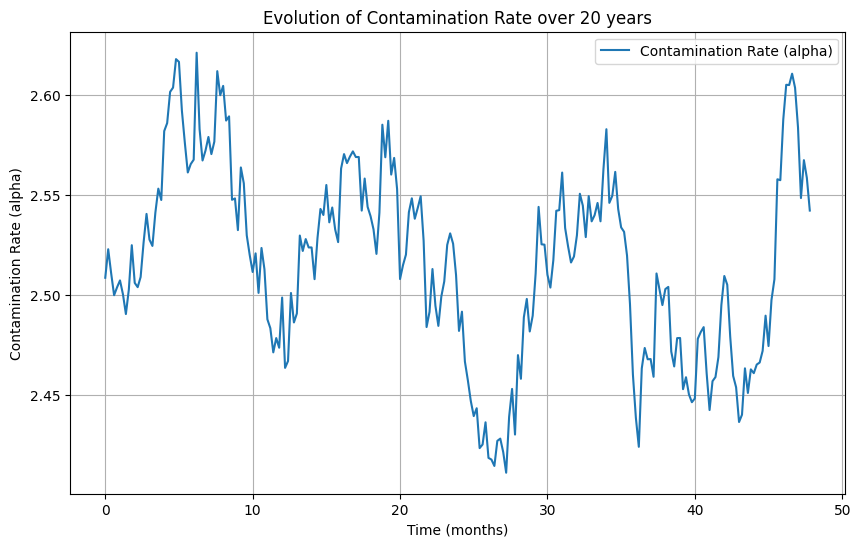

In [2]:

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T/5, alpha, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

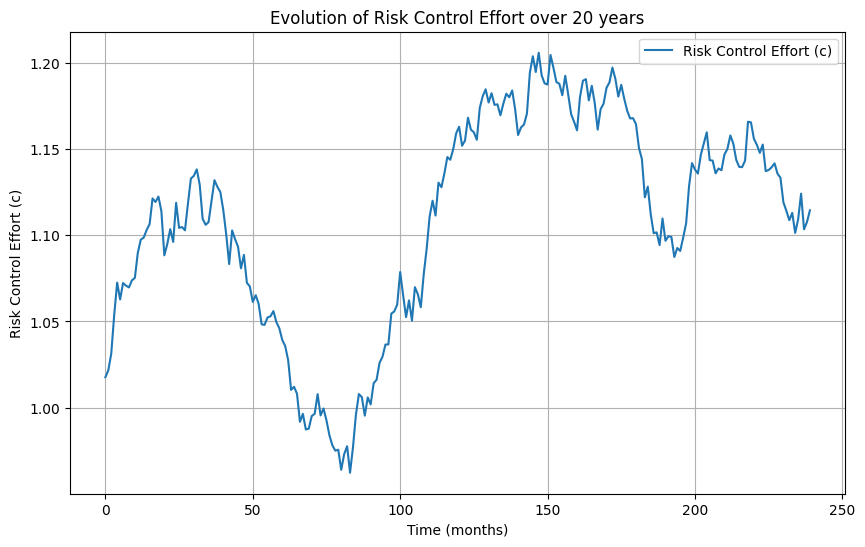

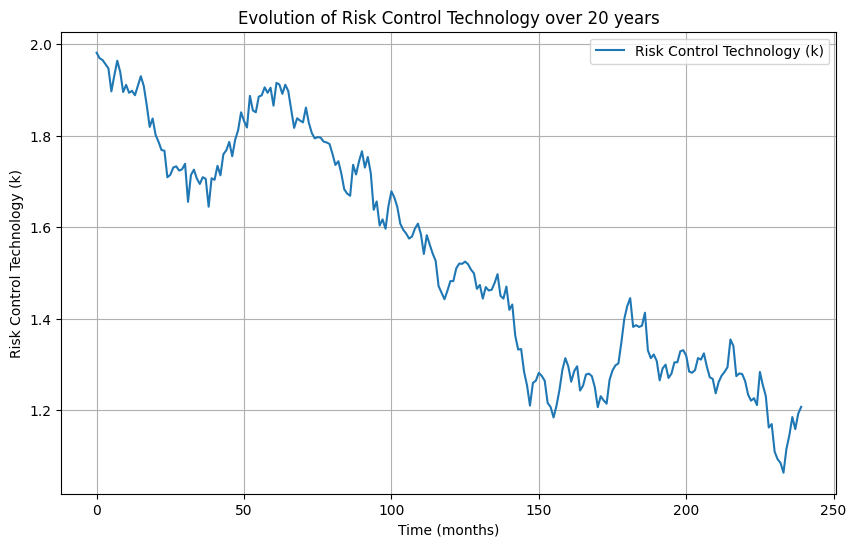

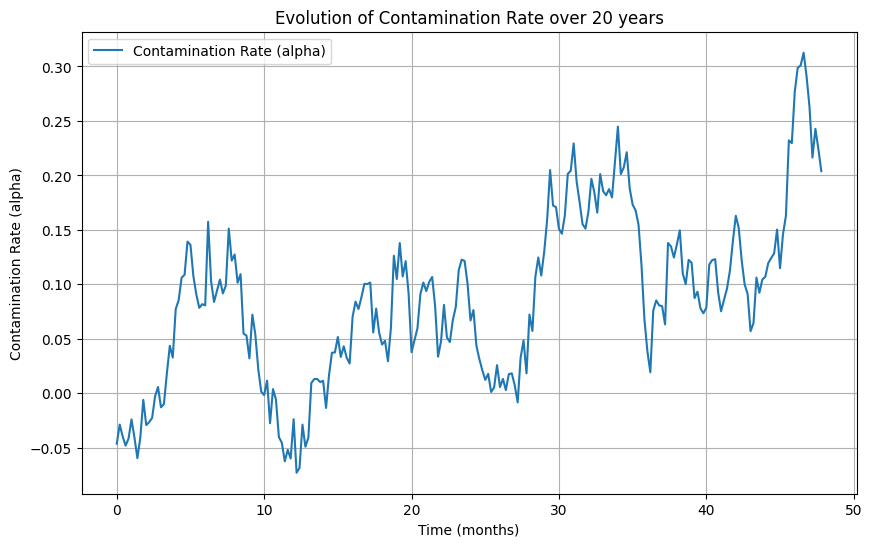

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the time period
T = np.arange(0, 240, 1)  # 20 years with monthly intervals

# Set your mean values for c, k and alpha
costs_mean = [1, 2, 2]  # dummy values, replace with your own mean values

# Generate hypothetical data for risk control effort (c), risk control technology (k)
np.random.seed(0)  # for reproducibility
c = np.cumsum(np.random.normal(loc=0, scale=0.01, size=T.shape)) + costs_mean[0]
k = np.cumsum(np.random.normal(loc=0, scale=0.03, size=T.shape)) + costs_mean[1]

# Define the combined effect term as a simple linear combination of c and k
e = 0.5 * c + 0.78 * k

# The contamination rate is a function of the combined effect term
alpha = np.cumsum(np.random.normal(loc=0, scale=0.01, size=T.shape)) - e + costs_mean[2]

# Rest of the plotting code stays the same...

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T/5, alpha, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

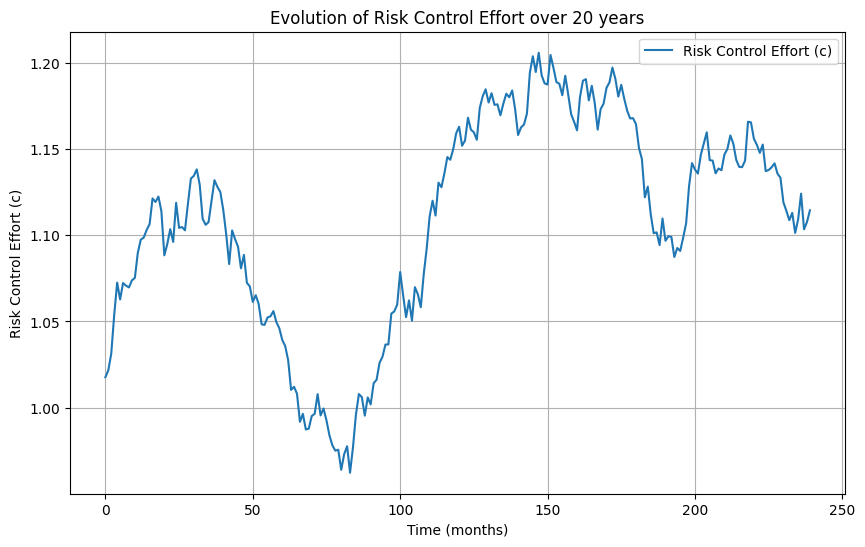

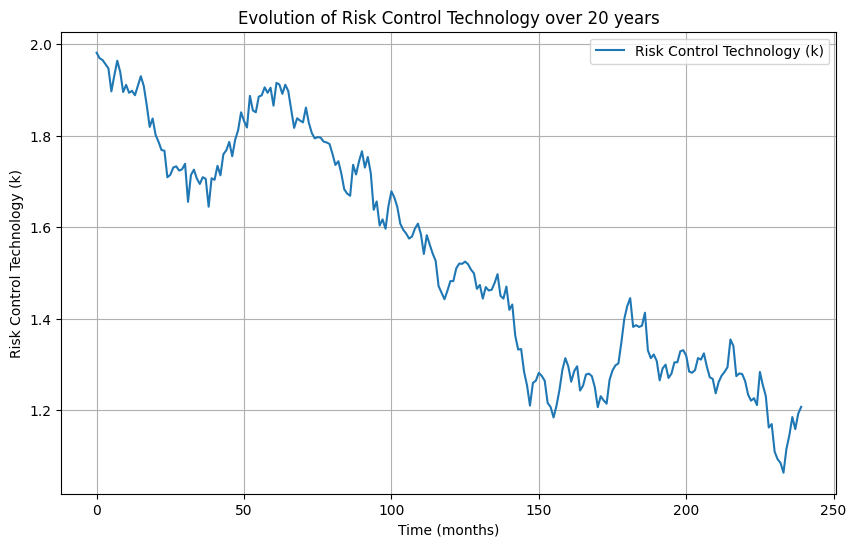

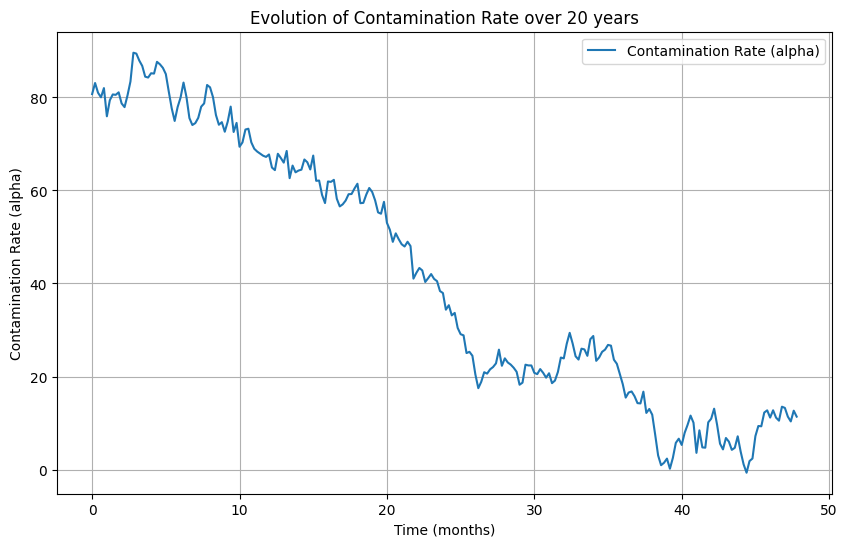

In [4]:

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T/5, alpha, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# they cannot learn from neighbors 
# technology transition can cause the technology to go to a lower value than the initial value, they cannot learn from neighbors for lower 
# technology from neighbors reduce the technology of the farm
# silicon valley technology spillover effects 

# they cannot learn from neighbors as they cannot adopt a higher technology than their initial technology
# cost for farmer and cost for system to test and trace
# check the cost plot 
